<a href="https://colab.research.google.com/github/hongphuong298/hongphuong_ead/blob/main/B%E1%BA%A2NH20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

# data_science_bowl_2018_path = kagglehub.competition_download('data-science-bowl-2018')

# print('Data source import complete.')


In [51]:
from google.colab import files

# Upload file kaggle.json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lethihongphuong","key":"3d84c164e05706a93d0e9f59f611618e"}'}

In [52]:
import os
import shutil

# Đường dẫn tới thư mục và tệp
destination_path = '/root/.kaggle/kaggle.json'

# Tạo thư mục .kaggle nếu chưa có
os.makedirs('/root/.kaggle', exist_ok=True)



# Di chuyển tệp kaggle.json vào thư mục .kaggle
shutil.move('kaggle.json', destination_path)

'/root/.kaggle/kaggle.json'

In [54]:
# Cấp quyền cho file để sử dụng
os.chmod('/root/.kaggle/kaggle.json', 600)


In [ ]:
# rm -rf /content/data-science-bowl-2018

In [55]:
!kaggle competitions download -c data-science-bowl-2018


 96% 345M/358M [00:03<00:00, 156MB/s]
100% 358M/358M [00:03<00:00, 117MB/s]


In [56]:
!pip install -U albumentations

In [57]:
import os
import time
import copy
from collections import defaultdict
import torch
import shutil
import pandas as pd
from skimage import io, transform
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, utils
from torch import nn
from albumentations import (HorizontalFlip, ShiftScaleRotate, Normalize, Resize, Compose, GaussNoise)
import cv2
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss,Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import torch.nn.functional as F
from PIL import Image
from torch import nn
import zipfile
import tqdm
import random

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def reset_seed():
  torch.manual_seed(42)
  random.seed(42)
  torch.cuda.manual_seed(42)
reset_seed()

In [58]:
!git clone https://github.com/SLDGroup/EMCAD.git

Cloning into 'EMCAD'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 195 (delta 7), reused 0 (delta 0), pack-reused 177 (from 1)
Receiving objects: 100% (195/195), 2.02 MiB | 4.13 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [ ]:

# Đường dẫn đến file zip
zip_path = '/content/data-science-bowl-2018.zip'

# Thư mục đích để giải nén
extract_to = '/content/data-science-bowl-2018'

# Tạo thư mục đích nếu chưa tồn tại
os.makedirs(extract_to, exist_ok=True)

# Giải nén file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset extracted to: {extract_to}")


In [ ]:
# rm -rf /content/EMCAD/data/*

In [59]:
import zipfile
import os

# Đường dẫn đến file zip
zip_path_tr = '/content/data-science-bowl-2018/stage1_train.zip'

# Thư mục đích để giải nén
extract_tr_to = '/content/EMCAD/data'

# Tạo thư mục đích nếu chưa tồn tại
os.makedirs(extract_tr_to, exist_ok=True)

# Giải nén file zip
with zipfile.ZipFile(zip_path_tr, 'r') as zip_ref:
    zip_ref.extractall(extract_tr_to)

print(f"Dataset extracted to: {extract_tr_to}")

Dataset extracted to: /content/EMCAD/data


In [60]:
seed = 42
np.random.seed = seed

img_size = 256
IMG_WIDTH = img_size
IMG_HEIGHT = img_size
IMG_CHANNELS = 3

In [61]:
cd /content/EMCAD

/content/EMCAD


In [ ]:
!pip install -r /content/EMCAD/requirements.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [62]:
cd /content/EMCAD/lib/

/content/EMCAD/lib


In [63]:
import argparse
import logging
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from EMCAD.lib.networks import EMCADNet


In [64]:
import sys
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from torch.utils.data import Dataset
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
from skimage import io, transform
import albumentations as A
from albumentations.pytorch import ToTensorV2


In [ ]:
!mkdir /content/EMCAD/pretrained_pth/pvt

In [ ]:
ls /content/EMCAD/pretrained_pth/pvt

In [65]:
import os
os.chdir('/content/EMCAD/lib/')

##################################33


In [66]:
import os
import numpy as np
import logging
from tqdm import tqdm
from skimage import io, transform
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
from albumentations import Compose, HorizontalFlip, Normalize
from albumentations.pytorch import ToTensorV2

# Hàm tạo augmentations
def get_transforms(mean, std):
    return Compose([
        HorizontalFlip(p=0.5),
        Normalize(mean=mean, std=std, p=1.0),
        ToTensorV2()
    ])

# Dataset class
class NucleiData(Dataset):
    def __init__(self, path):
        self.path = path
        self.folders = os.listdir(path)
        self.transforms = get_transforms(mean=0.5, std=0.5)

    def __len__(self):
        return len(self.folders)

    def __getitem__(self, idx):
        image_folder = os.path.join(self.path, self.folders[idx], 'images/')
        mask_folder = os.path.join(self.path, self.folders[idx], 'masks/')
        image_path = os.path.join(image_folder, os.listdir(image_folder)[0])

        # Read and preprocess image
        img = io.imread(image_path)[:, :, :3].astype('float32')
        img = transform.resize(img, (128, 128))

        # Get mask
        mask = self.get_mask(mask_folder, 128, 128)

        # Apply transformations
        augmented = self.transforms(image=img, mask=mask)
        img = augmented['image']  # [3, 128, 128]
        mask = augmented['mask']


        mask = mask.permute(2, 0, 1)  # Change from [H, W, C] to [C, H, W]

        # print("Image size after transform: ", img.shape)      # Should be [3, 128, 128]
        # print("Mask size after transform: ", mask.shape)      # Should be [1, 128, 128]


        return {
            "image": img.clone().detach().float(),
            "label": mask.clone().detach().float()

        }

    def get_mask(self, mask_folder, IMG_HEIGHT, IMG_WIDTH):
        mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.float32)
        for mask_ in os.listdir(mask_folder):
            mask_ = io.imread(os.path.join(mask_folder, mask_))
            mask_ = transform.resize(mask_, (IMG_HEIGHT, IMG_WIDTH))
            mask_ = np.expand_dims(mask_, axis=-1)
            mask = np.maximum(mask, mask_)
        return mask

In [67]:
ls /content/EMCAD/data

00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/
003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1/
00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/
0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed/
01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf/
0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21/
0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426/
02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339/
03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776/
03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe/
03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a/
0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd/
04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e/
05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13/
0532c64c2fd0c4d3188cc751cdfd566b1cfba3d269358717295bab1504c7c275/
05a8f65ebd

In [68]:
#loading the data
base_dir = '/content/EMCAD/data/'
data = NucleiData(base_dir)

In [146]:
# Initialize DataLoader
data_loader = DataLoader(data, batch_size=10, shuffle=True)

for batch in data_loader:
    images = batch['image']
    labels = batch['label']

    print(type(images), type(labels))  # Kiểm tra kiểu dữ liệu
    print(images.shape, labels.shape)  # Kiểm tra kích thước

    # Lấy chiều cao và chiều rộng của ảnh
    _, _, H, W = images.shape
    print(f"Height: {H}, Width: {W}")

    break  # Thoát khỏi vòng lặp sau batch đầu tiên


<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 3, 128, 128]) torch.Size([10, 1, 128, 128])
Height: 128, Width: 128


Original image shape: torch.Size([10, 3, 128, 128])
Original label shape: torch.Size([10, 1, 128, 128])
After squeezing: image shape: (10, 3, 128, 128)
After squeezing: label shape: (10, 1, 128, 128)
Processing image 0 with shape: (3, 128, 128)
Processing label 0 with shape: (1, 128, 128)
Slice 0 shape: (128, 128)
Input tensor shape for slice 0: torch.Size([1, 256, 256])


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[1, 1, 256, 256] to have 3 channels, but got 1 channels instead

In [105]:
logging.info(f"{len(data_loader)} test iterations per epoch")

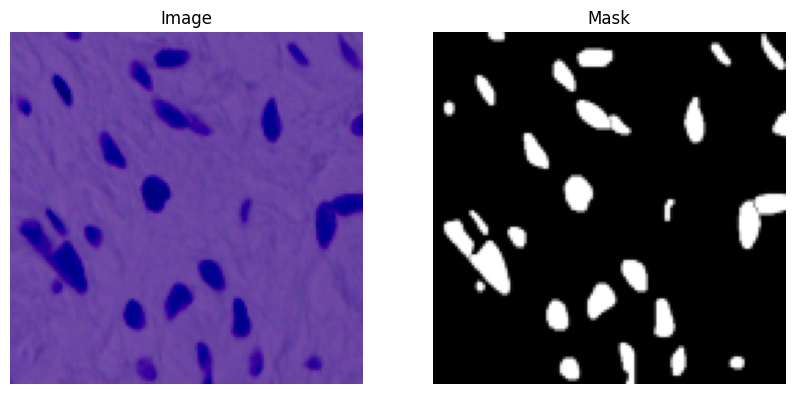

In [70]:


# Lấy một mẫu từ dataset
sample = data[0]  # Lấy mẫu đầu tiên (có thể thay đổi index)

# Lấy ảnh và mặt nạ từ sample
img = sample['image'].permute(1, 2, 0).numpy()  # Chuyển từ [C, H, W] sang [H, W, C]
mask = sample['label'][0].numpy()               # Mặt nạ [1, H, W] thành [H, W]

# Hiển thị ảnh và mặt nạ
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:
print(data.__len__())
data.__getitem__(0)

In [ ]:
for img, msk in data:
    print(type(img), type(msk))  # Check the types
    break

In [ ]:

trainset, valset = random_split(data, [580, 90])

train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=10, shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=valset, batch_size=10)

In [71]:
cd /content/EMCAD/utils


/content/EMCAD/utils


In [72]:
ls /content/EMCAD/utils

dataloader.py               EMCAD/                preprocess_synapse_data_3d.py  transforms.py
data-science-bowl-2018.zip  format_conversion.py  preprocess_synapse_data.py     utils.py
dataset_ACDC.py             joint_transforms.py   __pycache__/
dataset_synapse.py          misc.py               README.md


In [73]:
import os
import shutil
import logging
import sys
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from tensorboardX import SummaryWriter
# from utils.dataset_nuclei import NucleiData
# from utils.utils import powerset, one_hot_encoder, DiceLoss, val_single_volume
from EMCAD.lib.networks import EMCADNet
from tqdm.notebook import tqdm  # Import tqdm cho Jupyter Notebook

In [74]:
from EMCAD.utils.utils import powerset, one_hot_encoder, DiceLoss, val_single_volume

In [ ]:
# rm -rf /content/EMCAD/lib/EMCAD

In [75]:
import os
import shutil
import logging
import sys
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from tensorboardX import SummaryWriter
# from utils.dataset_nuclei import NucleiData
# from utils.utils import powerset, one_hot_encoder, DiceLoss, val_single_volume
from EMCAD.lib.networks import EMCADNet
from tqdm.notebook import tqdm

In [141]:
from EMCAD.utils.utils import powerset, one_hot_encoder, DiceLoss, val_single_volume


In [142]:
def trainer_nuclei(args, model, snapshot_path,train_loader,val_loader, data):
    print("okok")
    logging.basicConfig(filename=snapshot_path + "/log.txt", level=logging.INFO,
                        format='[%(asctime)s.%(msecs)03d] %(message)s', datefmt='%H:%M:%S')
    logging.getLogger().addHandler(logging.StreamHandler())
    logging.info(str(args))


    base_lr = args['base_lr']
    num_classes = args['num_classes']
    batch_size = args['batch_size'] * args['n_gpu']
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



    model.to(device)

    dice_loss = DiceLoss(num_classes)
    ce_loss = CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=base_lr, weight_decay=0.0001)
    writer = SummaryWriter(snapshot_path + '/log')

    max_epoch = args['max_epochs']
    best_performance = 0.0

    # Deep Supervision Setup
    out_idxs = list(range(num_classes))
    ss = [[x] for x in out_idxs]

    for epoch_num in range(max_epoch):
        model.train()
        epoch_loss = 0
        with tqdm(train_loader, desc=f'Epoch {epoch_num + 1}/{max_epoch}', unit='batch') as pbar:
            for i_batch, sampled_batch in enumerate(pbar):
                image_batch = sampled_batch['image'].to(device)
                label_batch = sampled_batch['label'].squeeze(1).to(device)

                # Forward pass
                outputs = model(image_batch)

                # Handle different output formats
                if isinstance(outputs, list):
                    # For deep supervision output
                    total_loss = 0
                    for output in outputs:
                        # Ensure output and label have matching dimensions
                        if output.dim() != label_batch.dim():
                            if output.dim() == 4:  # [B, C, H, W]
                                label_batch = label_batch.squeeze(1)  # Remove extra dimension if present
                            elif output.dim() == 5:  # [D, B, C, H, W]
                                output = output.mean(dim=0)  # Average over deep supervision outputs

                        loss_ce = ce_loss(output, label_batch.long())
                        loss_dice = dice_loss(output, label_batch, softmax=True)
                        total_loss += (0.3 * loss_ce + 0.7 * loss_dice)

                    loss = total_loss / len(outputs)  # Average loss across all outputs
                else:
                    # For single output
                    if outputs.dim() != label_batch.dim():
                        if outputs.dim() == 4:  # [B, C, H, W]
                            label_batch = label_batch.squeeze(1)
                        elif outputs.dim() == 5:  # [D, B, C, H, W]
                            outputs = outputs.mean(dim=0)

                    loss_ce = ce_loss(outputs, label_batch.long())
                    loss_dice = dice_loss(outputs, label_batch, softmax=True)
                    loss = 0.3 * loss_ce + 0.7 * loss_dice

                # Backpropagation and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()
                pbar.set_postfix(loss=loss.item())
                writer.add_scalar('info/loss', loss.item(), epoch_num * len(train_loader) + i_batch)

        avg_loss = epoch_loss / len(train_loader)
        logging.info(f'Epoch [{epoch_num + 1}/{max_epoch}] Average Loss: {avg_loss:.4f}')

        # Save model checkpoint
        save_mode_path = os.path.join(snapshot_path, f'epoch_{epoch_num + 1}.pth')
        torch.save(model.state_dict(), save_mode_path)

        # Validation
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# if(best_performance <= performance):
#             best_performance = performance
#             save_mode_path = os.path.join(snapshot_path, 'best.pth')
#             torch.save(model.state_dict(), save_mode_path)
#             logging.info("save model to {}".format(save_mode_path))



        performance = inference(args, model,val_loader=val_loader, data=data,device='cuda')

        #
        if performance > best_performance:
            best_performance = performance
            best_model_path = os.path.join(snapshot_path, 'best_model.pth')
            torch.save(model.state_dict(), best_model_path)
            logging.info(f"Best model saved at: {best_model_path}")

        logging.info(f"Epoch {epoch_num + 1} completed.")

    writer.close()
    return "Training Finished!"



def inference(args, model, val_loader,data, device='cuda'):
    """
    Run inference on the validation set.

    Args:
        args (dict): Configuration arguments.
        model (torch.nn.Module): The trained model.
        val_loader (DataLoader): DataLoader for validation set.
        device (str): Device to use ('cuda' or 'cpu').

    Returns:
        float: Average Dice score over the validation set.
    """
    # logging.info(f"{len(val_loader)} test iterations per epoch")
    model.to(device)
    model.eval()
    metric_list = 0.0

    # metric_list = np.zeros(args['num_classes'] - 1)  # Exclude background

    for i_batch, sampled_batch in tqdm(enumerate(val_loader), total=len(val_loader), desc="Validating"):
        image_batch = sampled_batch['image'].to(device)
        label_batch = sampled_batch['label'].to(device)
        # In kích thước của batch image và label
        print(f"Batch {i_batch}: Image shape: {image_batch.shape}")
        print(f"Batch {i_batch}: Label shape: {label_batch.shape}")
        _, _, H, W = image_batch.shape
        logging.info(f"Processing batch {i_batch + 1}: Height={H}, Width={W}")

        metric_i = val_single_volume(image_batch, label_batch, model, classes=args['num_classes'],
                                     patch_size=[args['img_size'], args['img_size']],
                                     test_save_path=None, case = None)
        metric_list += np.array(metric_i)

    metric_list /= len(data)
    performance = np.mean(metric_list, axis = 0)

    logging.info(f'Mean Dice score on validation set: {performance:.4f}')
    return performance



In [97]:
from medpy import metric
from scipy.ndimage import zoom


In [ ]:
import json
import csv

In [79]:
import os
path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
print(f"File tồn tại: {os.path.exists(path)}")

File tồn tại: True


In [80]:
!nvidia-smi


Tue Dec 24 15:24:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# from EMCAD.lib.pvtv2 import pvt_v2_b0, pvt_v2_b1, pvt_v2_b2, pvt_v2_b3, pvt_v2_b4, pvt_v2_b5
# from EMCAD.lib.resnet import resnet18, resnet34, resnet50, resnet101, resnet152
# from EMCAD.lib.decoders import EMCAD


# class EMCADNet(nn.Module):
#     def __init__(self, num_classes=1, kernel_sizes=[1,3,5], expansion_factor=2, dw_parallel=True, add=True, lgag_ks=3, activation='relu', encoder='pvt_v2_b2', pretrain=True):
#         super(EMCADNet, self).__init__()

#         # conv block to convert single channel to 3 channels
#         self.conv = nn.Sequential(
#             nn.Conv2d(1, 3, kernel_size=1),
#             nn.BatchNorm2d(3),
#             nn.ReLU(inplace=True)
#         )

#         # backbone network initialization with pretrained weight
#         if encoder == 'pvt_v2_b0':
#             self.backbone = pvt_v2_b0()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[256, 160, 64, 32]
#         elif encoder == 'pvt_v2_b1':
#             self.backbone = pvt_v2_b1()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[512, 320, 128, 64]
#         elif encoder == 'pvt_v2_b2':
#             self.backbone = pvt_v2_b2()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[512, 320, 128, 64]
#         elif encoder == 'pvt_v2_b3':
#             self.backbone = pvt_v2_b3()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[512, 320, 128, 64]
#         elif encoder == 'pvt_v2_b4':
#             self.backbone = pvt_v2_b4()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[512, 320, 128, 64]
#         elif encoder == 'pvt_v2_b5':
#             self.backbone = pvt_v2_b5()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[512, 320, 128, 64]
#         elif encoder == 'resnet18':
#             self.backbone = resnet18(pretrained=pretrain)
#             channels=[512, 256, 128, 64]
#         elif encoder == 'resnet34':
#             self.backbone = resnet34(pretrained=pretrain)
#             channels=[512, 256, 128, 64]
#         elif encoder == 'resnet50':
#             self.backbone = resnet50(pretrained=pretrain)
#             channels=[2048, 1024, 512, 256]
#         elif encoder == 'resnet101':
#             self.backbone = resnet101(pretrained=pretrain)
#             channels=[2048, 1024, 512, 256]
#         elif encoder == 'resnet152':
#             self.backbone = resnet152(pretrained=pretrain)
#             channels=[2048, 1024, 512, 256]
#         else:
#             print('Encoder not implemented! Continuing with default encoder pvt_v2_b2.')
#             self.backbone = pvt_v2_b2()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[512, 320, 128, 64]

#         if pretrain==True and 'pvt_v2' in encoder:
#             save_model = torch.load(path)
#             model_dict = self.backbone.state_dict()
#             state_dict = {k: v for k, v in save_model.items() if k in model_dict.keys()}
#             model_dict.update(state_dict)
#             self.backbone.load_state_dict(model_dict)

#         print('Model %s created, param count: %d' %
#                      (encoder+' backbone: ', sum([m.numel() for m in self.backbone.parameters()])))

#         #   decoder initialization
#         self.decoder = EMCAD(channels=channels, kernel_sizes=kernel_sizes, expansion_factor=expansion_factor, dw_parallel=dw_parallel, add=add, lgag_ks=lgag_ks, activation=activation)

#         print('Model %s created, param count: %d' %
#                      ('EMCAD decoder: ', sum([m.numel() for m in self.decoder.parameters()])))

#         self.out_head4 = nn.Conv2d(channels[0], num_classes, 1)
#         self.out_head3 = nn.Conv2d(channels[1], num_classes, 1)
#         self.out_head2 = nn.Conv2d(channels[2], num_classes, 1)
#         self.out_head1 = nn.Conv2d(channels[3], num_classes, 1)

#     def forward(self, x, mode='test'):

#         # if grayscale input, convert to 3 channels
#         if x.size()[1] == 1:
#             x = self.conv(x)

#         # encoder
#         x1, x2, x3, x4 = self.backbone(x)
#         #print(x1.shape, x2.shape, x3.shape, x4.shape)

#         # decoder
#         dec_outs = self.decoder(x4, [x3, x2, x1])

#         # prediction heads
#         p4 = self.out_head4(dec_outs[0])
#         p3 = self.out_head3(dec_outs[1])
#         p2 = self.out_head2(dec_outs[2])
#         p1 = self.out_head1(dec_outs[3])

#         p4 = F.interpolate(p4, scale_factor=32, mode='bilinear')
#         p3 = F.interpolate(p3, scale_factor=16, mode='bilinear')
#         p2 = F.interpolate(p2, scale_factor=8, mode='bilinear')
#         p1 = F.interpolate(p1, scale_factor=4, mode='bilinear')

#         if mode == 'test':
#             return [p4, p3, p2, p1]

#         return [p4, p3, p2, p1]



# if __name__ == '__main__':
#     model = EMCADNet().cuda()
#     input_tensor = torch.randn(1, 3, 352, 352).cuda()

#     P = model(input_tensor)
#     print(P[0].size(), P[1].size(), P[2].size(), P[3].size())



670


In [ ]:
#     args = {
#     'volume_path': '/content/EMCAD/data/',
#     'num_classes': 2,
#     'batch_size': 10,
#     'max_epochs': 10,
#     'base_lr': 1e-4,
#     'n_gpu': 1,
#     'img_size': 256,
#     'list_dir': './train_val_split',
#     'kernel_sizes': [1, 3, 5],
#     'expansion_factor': 2,
#     'dw_parallel': True,
#     'activation': 'relu',
#     'encoder': 'pvt_v2_b2',
#     'pretrain': True
# }


In [151]:

import torch
import torch.nn as nn
import numpy as np
from medpy import metric
from scipy.ndimage import zoom
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from segmentation_mask_overlay import overlay_masks
import matplotlib.colors as mcolors

import SimpleITK as sitk
import pandas as pd

from thop import profile
from thop import clever_format
from ptflops import get_model_complexity_info

def powerset(seq):
    """
    Returns all the subsets of this set. This is a generator.
    """
    if len(seq) <= 1:
        yield seq
        yield []
    else:
        for item in powerset(seq[1:]):
            yield [seq[0]]+item
            yield item

def clip_gradient(optimizer, grad_clip):
    """
    For calibrating misalignment gradient via cliping gradient technique
    :param optimizer:
    :param grad_clip:
    :return:
    """
    for group in optimizer.param_groups:
        for param in group['params']:
            if param.grad is not None:
                param.grad.data.clamp_(-grad_clip, grad_clip)

def adjust_lr(optimizer, init_lr, epoch, decay_rate=0.1, decay_epoch=30):
    decay = decay_rate ** (epoch // decay_epoch)
    for param_group in optimizer.param_groups:
        param_group['lr'] *= decay

class AvgMeter(object):
    def __init__(self, num=40):
        self.num = num
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        self.losses = []

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        self.losses.append(val)

    def show(self):
        return torch.mean(torch.stack(self.losses[np.maximum(len(self.losses)-self.num, 0):]))

def CalParams(model, input_tensor):
    """
    Usage:
        Calculate Params and FLOPs via [THOP](https://github.com/Lyken17/pytorch-OpCounter)
    Necessarity:
        from thop import profile
        from thop import clever_format
    :param model:
    :param input_tensor:
    :return:
    """
    flops, params = profile(model, inputs=(input_tensor,))
    flops, params = clever_format([flops, params], "%.3f")
    print('[Statistics Information]\nFLOPs: {}\nParams: {}'.format(flops, params))

def one_hot_encoder(input_tensor,dataset,n_classes = None):
    tensor_list = []
    if dataset == 'MMWHS':
        dict = [0,205,420,500,550,600,820,850]
        for i in dict:
            temp_prob = input_tensor == i
            tensor_list.append(temp_prob.unsqueeze(1))
        output_tensor = torch.cat(tensor_list, dim=1)
        return output_tensor.float()
    else:
        for i in range(n_classes):
            temp_prob = input_tensor == i
            tensor_list.append(temp_prob.unsqueeze(1))
        output_tensor = torch.cat(tensor_list, dim=1)
        return output_tensor.float()

class DiceLoss(nn.Module):
    def __init__(self, n_classes):
        super(DiceLoss, self).__init__()
        self.n_classes = n_classes

    def _one_hot_encoder(self, input_tensor):
        tensor_list = []
        for i in range(self.n_classes):
            temp_prob = input_tensor == i  # * torch.ones_like(input_tensor)
            tensor_list.append(temp_prob.unsqueeze(1))
        output_tensor = torch.cat(tensor_list, dim=1)
        return output_tensor.float()

    def _dice_loss(self, score, target):
        target = target.float()
        smooth = 1e-5
        intersect = torch.sum(score * target)
        y_sum = torch.sum(target * target)
        z_sum = torch.sum(score * score)
        loss = (2 * intersect + smooth) / (z_sum + y_sum + smooth)
        loss = 1 - loss
        return loss

    def forward(self, inputs, target, weight=None, softmax=False):
        if softmax:
            inputs = torch.softmax(inputs, dim=1)
        target = self._one_hot_encoder(target)
        if weight is None:
            weight = [1] * self.n_classes
        assert inputs.size() == target.size(), 'predict {} & target {} shape do not match'.format(inputs.size(), target.size())
        class_wise_dice = []
        loss = 0.0
        for i in range(0, self.n_classes):
            dice = self._dice_loss(inputs[:, i], target[:, i])
            class_wise_dice.append(1.0 - dice.item())
            loss += dice * weight[i]
        return loss / self.n_classes

def calculate_metric_percase(pred, gt):
    pred[pred > 0] = 1
    gt[gt > 0] = 1
    if pred.sum() > 0 and gt.sum()>0:
        dice = metric.binary.dc(pred, gt)
        hd95 = metric.binary.hd95(pred, gt)
        jaccard = metric.binary.jc(pred, gt)
        asd = metric.binary.assd(pred, gt)
        return dice, hd95, jaccard, asd
    elif pred.sum() > 0 and gt.sum()==0:
        return 1, 0, 1, 0
    else:
        return 0, 0, 0, 0

def calculate_dice_percase(pred, gt):
    pred[pred > 0] = 1
    gt[gt > 0] = 1
    if pred.sum() > 0 and gt.sum()>0:
        dice = metric.binary.dc(pred, gt)
        return dice
    elif pred.sum() > 0 and gt.sum()==0:
        return 1
    else:
        return 0

def test_single_volume(image, label, net, classes, patch_size=[256, 256], test_save_path=None, case=None, z_spacing=1, class_names=None):
    image, label = image.squeeze(0).cpu().detach().numpy(), label.squeeze(0).cpu().detach().numpy()
    if class_names==None:
        mask_labels = np.arange(1,classes)
    else:
        mask_labels = class_names
    cmaps = mcolors.CSS4_COLORS
    my_colors=['red','darkorange','yellow','forestgreen','blue','purple','magenta','cyan','deeppink', 'chocolate', 'olive','deepskyblue','darkviolet']
    cmap = {k: cmaps[k] for k in sorted(cmaps.keys()) if k in my_colors[:classes-1]}
    if len(image.shape) == 3:
        prediction = np.zeros_like(label)
        for ind in range(image.shape[0]):
            slice = image[ind, :, :]
            x, y = slice.shape[0], slice.shape[1]
            if x != patch_size[0] or y != patch_size[1]:
                slice = zoom(slice, (patch_size[0] / x, patch_size[1] / y), order=3)  # previous using 0
            input = torch.from_numpy(slice).unsqueeze(0).unsqueeze(0).float().cuda()
            net.eval()
            with torch.no_grad():
                P = net(input)
                outputs = P[-1]
                out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
                out = out.cpu().detach().numpy()
                if x != patch_size[0] or y != patch_size[1]:
                    pred = zoom(out, (x / patch_size[0], y / patch_size[1]), order=0)
                else:
                    pred = out
                prediction[ind] = pred
                # saving the final output as a PNG file
                #print(test_save_path + '/'+case + '' +str(ind))
                #Image.fromarray((pred/8 * 255).astype(np.uint8)).save(test_save_path + '/'+case + '' +str(ind)+'_pred.png')
                #Image.fromarray((image[ind, :, :] * 255).astype(np.uint8)).save(test_save_path + '/'+case + '' +str(ind)+'_img.png')
                #Image.fromarray((label[ind, :, :]/8 * 255).astype(np.uint8)).save(test_save_path + '/'+case + '' +str(ind)+'_gt.png')
                #cmap = plt.cm.tab20(np.arange(len(mask_labels)))

                lbl = label[ind, :, :]
                masks = []
                for i in range(1, classes):
                    masks.append(lbl==i)
                preds_o = []
                for i in range(1, classes):
                    preds_o.append(pred==i)

                fig_gt = overlay_masks(image[ind, :, :], masks, labels=mask_labels, colors=cmap, mask_alpha=0.5)
                fig_pred = overlay_masks(image[ind, :, :], preds_o, labels=mask_labels, colors=cmap, mask_alpha=0.5)
                # Do with that image whatever you want to do.
                fig_gt.savefig(test_save_path + '/' + case + '_' +str(ind) + '_gt.png', bbox_inches="tight", dpi=300)
                fig_pred.savefig(test_save_path + '/' + case + '_' +str(ind) + '_pred.png', bbox_inches="tight", dpi=300)

    else:
        input = torch.from_numpy(image).unsqueeze(
            0).unsqueeze(0).float().cuda()
        net.eval()
        with torch.no_grad():
            P = net(input)
            outputs = P[-1]
            out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
            prediction = out.cpu().detach().numpy()
    metric_list = []
    for i in range(1, classes):
        metric_list.append(calculate_metric_percase(prediction == i, label == i))

    if test_save_path is not None:
        img_itk = sitk.GetImageFromArray(image.astype(np.float32))
        prd_itk = sitk.GetImageFromArray(prediction.astype(np.float32))
        lab_itk = sitk.GetImageFromArray(label.astype(np.float32))
        img_itk.SetSpacing((1, 1, z_spacing))
        prd_itk.SetSpacing((1, 1, z_spacing))
        lab_itk.SetSpacing((1, 1, z_spacing))
        sitk.WriteImage(prd_itk, test_save_path + '/'+case + "_pred.nii.gz")
        sitk.WriteImage(img_itk, test_save_path + '/'+ case + "_img.nii.gz")
        sitk.WriteImage(lab_itk, test_save_path + '/'+ case + "_gt.nii.gz")
    return metric_list
# def val_single_volume(image, label, net, classes, patch_size=[256, 256], test_save_path=None, case=None):
#     """
#     Validate a single volume (image and label).
#     """
#     # In kích thước của image và label ngay từ đầu
#     print(f"Original image shape: {image.shape}")
#     print(f"Original label shape: {label.shape}")

#     image = image.squeeze(0).cpu().detach().numpy()
#     label = label.squeeze(0).cpu().detach().numpy()

#     print(f"After squeezing: image shape: {image.shape}")
#     print(f"After squeezing: label shape: {label.shape}")

#     batch_size = image.shape[0] if len(image.shape) > 3 else 1
#     metric_list = []

#     # Lặp qua từng ảnh trong batch
#     for i in range(batch_size):
#         single_image = image[i] if batch_size > 1 else image
#         single_label = label[i] if batch_size > 1 else label

#         # In kích thước của mỗi ảnh sau khi lấy ra
#         print(f"Processing image {i} with shape: {single_image.shape}")
#         print(f"Processing label {i} with shape: {single_label.shape}")

#         # Nếu ảnh là 3D, lặp qua từng slice
#         if len(single_image.shape) == 3:
#             prediction = np.zeros_like(single_label)
#             for ind in range(single_image.shape[0]):  # Lặp qua từng slice
#                 slice_ = single_image[ind, :, :]
#                 print(f"Slice {ind} shape: {slice_.shape}")

#                 x, y = slice_.shape

#                 if x != patch_size[0] or y != patch_size[1]:
#                     slice_ = zoom(slice_, (patch_size[0] / x, patch_size[1] / y), order=3)

#                 input_tensor = torch.from_numpy(slice_).unsqueeze(0).float().cuda()
#                 print(f"Input tensor shape for slice {ind}: {input_tensor.shape}")

#                 net.eval()
#                 with torch.no_grad():
#                     P = net(input_tensor)
#                     outputs = P[-1] if isinstance(P, list) else P
#                     out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
#                     out = out.cpu().detach().numpy()

#                     if x != patch_size[0] or y != patch_size[1]:
#                         pred = zoom(out, (x / patch_size[0], y / patch_size[1]), order=0)
#                     else:
#                         pred = out
#                     prediction[ind] = pred
#         else:
#             # Ảnh 2D
#             input_tensor = torch.from_numpy(single_image).unsqueeze(0).float().cuda()
#             print(f"Input tensor shape (2D): {input_tensor.shape}")

#             net.eval()
#             with torch.no_grad():
#                 P = net(input_tensor)
#                 outputs = P[-1] if isinstance(P, list) else P
#                 out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
#                 prediction = out.cpu().detach().numpy()

#         # Tính các metrics cho từng class
#         for i in range(1, classes):
#             dice_score = calculate_dice_percase(prediction == i, single_label == i)
#             metric_list.append(dice_score)

#     return metric_list
def val_single_volume(image, label, net, classes, patch_size=[128, 128], test_save_path=None, case=None):
    """
    Validate a single volume (image and label).
    """
    # print(f"Original image shape: {image.shape}")
    # print(f"Original label shape: {label.shape}")

    # Chuyển sang numpy
    image = image.cpu().detach().numpy()
    label = label.cpu().detach().numpy()

    # print(f"After converting to numpy: image shape: {image.shape}")
    # print(f"After converting to numpy: label shape: {label.shape}")

    batch_size = image.shape[0]
    metric_list = []

    # Lặp qua từng ảnh trong batch
    for idx in range(batch_size):
        single_image = image[idx]  # Shape: (3, H, W) for RGB images
        single_label = label[idx]  # Shape: (1, H, W)

        # print(f"Processing image {idx} with shape: {single_image.shape}")
        # print(f"Processing label {idx} with shape: {single_label.shape}")

        # Kiểm tra và resize nếu cần
        if single_image.shape[1:] != tuple(patch_size):
            # Resize từng channel
            resized_image = np.zeros((single_image.shape[0], patch_size[0], patch_size[1]))
            for c in range(single_image.shape[0]):
                resized_image[c] = zoom(single_image[c], (patch_size[0] / single_image.shape[1],
                                                        patch_size[1] / single_image.shape[2]), order=3)
            single_image = resized_image

        # Chuẩn bị input tensor
        input_tensor = torch.from_numpy(single_image).unsqueeze(0).float().cuda()
        print(f"Input tensor shape: {input_tensor.shape}")

        # Inference
        net.eval()
        with torch.no_grad():
            outputs = net(input_tensor)
            if isinstance(outputs, list):
                outputs = outputs[-1]
            out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
            prediction = out.cpu().detach().numpy()

            # Resize prediction về kích thước gốc nếu cần
            if prediction.shape != single_label.shape[1:]:
                prediction = zoom(prediction, (single_label.shape[1] / prediction.shape[0],
                                            single_label.shape[2] / prediction.shape[1]), order=0)

        # Tính metrics cho từng class
        for class_idx in range(1, classes):
            dice_score = calculate_dice_percase(prediction == class_idx,
                                              single_label[0] == class_idx)
            print(f"Dice score for class {i}: {dice_score}")
            metric_list.append(dice_score)

    return metric_list
def horizontal_flip(image):
    image = image[:, ::-1, :]
    return image

def vertical_flip(image):
    image = image[::-1, :, :]
    return image

def tta_model(model, image):
    n_image = image
    h_image = horizontal_flip(image)
    v_image = vertical_flip(image)

    n_mask = model.predict(np.expand_dims(n_image, axis=0))[0]
    h_mask = model.predict(np.expand_dims(h_image, axis=0))[0]
    v_mask = model.predict(np.expand_dims(v_image, axis=0))[0]

    n_mask = n_mask
    h_mask = horizontal_flip(h_mask)
    v_mask = vertical_flip(v_mask)

    mean_mask = (n_mask + h_mask + v_mask) / 3.0
    return mean_mask

def cal_params_flops(model, size, logger):
    input = torch.randn(1, 3, size, size).cuda()
    flops, params = profile(model, inputs=(input,))
    print('flops',flops/1e9)			## 打印计算量
    print('params',params/1e6)			## 打印参数量

    total = sum(p.numel() for p in model.parameters())
    print("Total params: %.2fM" % (total/1e6))
    logger.info(f'flops: {flops/1e9}, params: {params/1e6}, Total params: : {total/1e6:.4f}')

# Example function to calculate and print GMACs and parameter count for a given model
def print_model_stats(model, input_size=(3, 224, 224)):
    # Print model parameter count
    total_params = sum(p.numel() for p in model.parameters())
    print(f'Model created, param count: {total_params}')

    # Calculate GMACs using ptflops
    macs, params = get_model_complexity_info(model, input_size, as_strings=True, print_per_layer_stat=True)

    # Display GMACs and params
    print(f'Model: {macs} GMACs, {params} parameters')

In [ ]:

args = {
    'volume_path': '/content/EMCAD/data/',
    'num_classes': 2,
    'batch_size': 15,
    'max_epochs': 10,
    'base_lr': 1e-4,
    'n_gpu': 1,
    'img_size': 256,
    'list_dir': './train_val_split',
    'kernel_sizes': [1, 3, 5],
    'expansion_factor': 2,
    'dw_parallel': True,
    'activation': 'relu',
    'encoder': 'pvt_v2_b2',
    'pretrain': True
}
    # Dataset and DataLoader setup
data = NucleiData(args['volume_path'])
trainset, valset = random_split(data, [580, 90])
train_loader = DataLoader(dataset=trainset, batch_size=args['batch_size'], shuffle=True)
val_loader = DataLoader(dataset=valset, batch_size=args['batch_size'])
logging.info(f"{len(val_loader)} test iterations per epoch")
print(len(data))
# Tạo mô hình EMCADNet với các tham số cấu hình
model = EMCADNet(
    num_classes=args['num_classes'],  # Số lớp trong phân đoạn
    kernel_sizes=args['kernel_sizes'],  # Kích thước kernel cho decoder
    expansion_factor=args['expansion_factor'],  # Hệ số mở rộng cho decoder
    dw_parallel=args['dw_parallel'],  # Chế độ song song cho convolution
    add=True,  # Thêm các lớp residual
    lgag_ks=3,  # Kích thước kernel cho LGAG
    activation=args['activation'],  # Hàm kích hoạt
    encoder=args['encoder'],  # Encoder bạn muốn sử dụng
    pretrain=args['pretrain'] # Có tải trọng lượng pretrained hay không
).cuda()  # Chuyển mô hình sang GPU nếu có

# Load pre-trained weights if pretrain is True
if args['pretrain']:
    pretrained_dict = torch.load('/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth') # Confirmed absolute path

    # Remove the 'module.' prefix from the keys in the pretrained_dict
    pretrained_dict = {k.replace('module.', ''): v for k, v in pretrained_dict.items()}

    model_dict = model.state_dict()

    # Filter out unnecessary keys and update the model's state dict
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and v.shape == model_dict[k].shape}
    model_dict.update(pretrained_dict)

    # Load the updated state dict into the model
    model.load_state_dict(model_dict, strict=False)  # strict=False allows loading a subset of weights

# Đường dẫn lưu mô hình
snapshot_path = '/content/EMCAD/check/checkpoints'
os.makedirs(snapshot_path, exist_ok=True)

# Bắt đầu huấn luyện
trainer_nuclei(args, model, snapshot_path, train_loader, val_loader,data)

670


<ipython-input-86-26e2590d6c5e>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  save_model = torch.load(path)


Model pvt_v2_b2 backbone:  created, param count: 24849856
Model EMCAD decoder:  created, param count: 1913515
okok


<ipython-input-153-6d9f3111dc5d>:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load('/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth') # Confirme

Epoch 1/10:   0%|          | 0/39 [00:00<?, ?batch/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]

Batch 0: Image shape: torch.Size([15, 3, 128, 128])
Batch 0: Label shape: torch.Size([15, 1, 128, 128])
Original image shape: torch.Size([15, 3, 128, 128])
Original label shape: torch.Size([15, 1, 128, 128])
After converting to numpy: image shape: (15, 3, 128, 128)
After converting to numpy: label shape: (15, 1, 128, 128)
Processing image 0 with shape: (3, 128, 128)
Processing label 0 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 1 with shape: (3, 128, 128)
Processing label 1 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 2 with shape: (3, 128, 128)
Processing label 2 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 3 with shape: (3, 128, 128)
Processing label 3 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 4 with shape: (3, 128, 128)
Processing label 4 with shape: (1, 128, 128)
Input tensor shape: torch.Size

Epoch 2/10:   0%|          | 0/39 [00:00<?, ?batch/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]

Batch 0: Image shape: torch.Size([15, 3, 128, 128])
Batch 0: Label shape: torch.Size([15, 1, 128, 128])
Original image shape: torch.Size([15, 3, 128, 128])
Original label shape: torch.Size([15, 1, 128, 128])
After converting to numpy: image shape: (15, 3, 128, 128)
After converting to numpy: label shape: (15, 1, 128, 128)
Processing image 0 with shape: (3, 128, 128)
Processing label 0 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 1 with shape: (3, 128, 128)
Processing label 1 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 2 with shape: (3, 128, 128)
Processing label 2 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 3 with shape: (3, 128, 128)
Processing label 3 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 4 with shape: (3, 128, 128)
Processing label 4 with shape: (1, 128, 128)
Input tensor shape: torch.Size

Epoch 3/10:   0%|          | 0/39 [00:00<?, ?batch/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]

Batch 0: Image shape: torch.Size([15, 3, 128, 128])
Batch 0: Label shape: torch.Size([15, 1, 128, 128])
Original image shape: torch.Size([15, 3, 128, 128])
Original label shape: torch.Size([15, 1, 128, 128])
After converting to numpy: image shape: (15, 3, 128, 128)
After converting to numpy: label shape: (15, 1, 128, 128)
Processing image 0 with shape: (3, 128, 128)
Processing label 0 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 1 with shape: (3, 128, 128)
Processing label 1 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 2 with shape: (3, 128, 128)
Processing label 2 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 3 with shape: (3, 128, 128)
Processing label 3 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 4 with shape: (3, 128, 128)
Processing label 4 with shape: (1, 128, 128)
Input tensor shape: torch.Size

Epoch 4/10:   0%|          | 0/39 [00:00<?, ?batch/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]

Batch 0: Image shape: torch.Size([15, 3, 128, 128])
Batch 0: Label shape: torch.Size([15, 1, 128, 128])
Original image shape: torch.Size([15, 3, 128, 128])
Original label shape: torch.Size([15, 1, 128, 128])
After converting to numpy: image shape: (15, 3, 128, 128)
After converting to numpy: label shape: (15, 1, 128, 128)
Processing image 0 with shape: (3, 128, 128)
Processing label 0 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 1 with shape: (3, 128, 128)
Processing label 1 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 2 with shape: (3, 128, 128)
Processing label 2 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 3 with shape: (3, 128, 128)
Processing label 3 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 256, 256])
Processing image 4 with shape: (3, 128, 128)
Processing label 4 with shape: (1, 128, 128)
Input tensor shape: torch.Size

Epoch 5/10:   0%|          | 0/39 [00:00<?, ?batch/s]

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from EMCAD.lib.pvtv2 import pvt_v2_b0, pvt_v2_b1, pvt_v2_b2, pvt_v2_b3, pvt_v2_b4, pvt_v2_b5
from EMCAD.lib.resnet import resnet18, resnet34, resnet50, resnet101, resnet152
from EMCAD.lib.decoders import EMCAD


class EMCADNet(nn.Module):
    def __init__(self, num_classes=1, kernel_sizes=[1,3,5], expansion_factor=2, dw_parallel=True, add=True, lgag_ks=3, activation='relu', encoder='pvt_v2_b2', pretrain=True):
        super(EMCADNet, self).__init__()

        # conv block to convert single channel to 3 channels
        self.conv = nn.Sequential(
            nn.Conv2d(1, 3, kernel_size=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True)
        )

        # backbone network initialization with pretrained weight
        if encoder == 'pvt_v2_b0':
            self.backbone = pvt_v2_b0()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
            channels=[256, 160, 64, 32]
        elif encoder == 'pvt_v2_b1':
            self.backbone = pvt_v2_b1()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'pvt_v2_b2':
            self.backbone = pvt_v2_b2()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'pvt_v2_b3':
            self.backbone = pvt_v2_b3()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'pvt_v2_b4':
            self.backbone = pvt_v2_b4()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'pvt_v2_b5':
            self.backbone = pvt_v2_b5()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'resnet18':
            self.backbone = resnet18(pretrained=pretrain)
            channels=[512, 256, 128, 64]
        elif encoder == 'resnet34':
            self.backbone = resnet34(pretrained=pretrain)
            channels=[512, 256, 128, 64]
        elif encoder == 'resnet50':
            self.backbone = resnet50(pretrained=pretrain)
            channels=[2048, 1024, 512, 256]
        elif encoder == 'resnet101':
            self.backbone = resnet101(pretrained=pretrain)
            channels=[2048, 1024, 512, 256]
        elif encoder == 'resnet152':
            self.backbone = resnet152(pretrained=pretrain)
            channels=[2048, 1024, 512, 256]
        else:
            print('Encoder not implemented! Continuing with default encoder pvt_v2_b2.')
            self.backbone = pvt_v2_b2()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
            channels=[512, 320, 128, 64]

        if pretrain==True and 'pvt_v2' in encoder:
            save_model = torch.load(path)
            model_dict = self.backbone.state_dict()
            state_dict = {k: v for k, v in save_model.items() if k in model_dict.keys()}
            model_dict.update(state_dict)
            self.backbone.load_state_dict(model_dict)

        print('Model %s created, param count: %d' %
                     (encoder+' backbone: ', sum([m.numel() for m in self.backbone.parameters()])))

        #   decoder initialization
        self.decoder = EMCAD(channels=channels, kernel_sizes=kernel_sizes, expansion_factor=expansion_factor, dw_parallel=dw_parallel, add=add, lgag_ks=lgag_ks, activation=activation)

        print('Model %s created, param count: %d' %
                     ('EMCAD decoder: ', sum([m.numel() for m in self.decoder.parameters()])))

        self.out_head4 = nn.Conv2d(channels[0], num_classes, 1)
        self.out_head3 = nn.Conv2d(channels[1], num_classes, 1)
        self.out_head2 = nn.Conv2d(channels[2], num_classes, 1)
        self.out_head1 = nn.Conv2d(channels[3], num_classes, 1)

    def forward(self, x, mode='test'):

        # if grayscale input, convert to 3 channels
        if x.size()[1] == 1:
            x = self.conv(x)

        # encoder
        x1, x2, x3, x4 = self.backbone(x)
        #print(x1.shape, x2.shape, x3.shape, x4.shape)

        # decoder
        dec_outs = self.decoder(x4, [x3, x2, x1])

        # prediction heads
        p4 = self.out_head4(dec_outs[0])
        p3 = self.out_head3(dec_outs[1])
        p2 = self.out_head2(dec_outs[2])
        p1 = self.out_head1(dec_outs[3])

        p4 = F.interpolate(p4, scale_factor=32, mode='bilinear')
        p3 = F.interpolate(p3, scale_factor=16, mode='bilinear')
        p2 = F.interpolate(p2, scale_factor=8, mode='bilinear')
        p1 = F.interpolate(p1, scale_factor=4, mode='bilinear')

        if mode == 'test':
            return [p4, p3, p2, p1]

        return [p4, p3, p2, p1]



if __name__ == '__main__':
    model = EMCADNet().cuda()
    input_tensor = torch.randn(1, 3, 352, 352).cuda()

    P = model(input_tensor)
    print(P[0].size(), P[1].size(), P[2].size(), P[3].size())



<ipython-input-86-26e2590d6c5e>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  save_model = torch.load(path)


Model pvt_v2_b2 backbone:  created, param count: 24849856
Model EMCAD decoder:  created, param count: 1913515
torch.Size([1, 1, 352, 352]) torch.Size([1, 1, 352, 352]) torch.Size([1, 1, 352, 352]) torch.Size([1, 1, 352, 352])


In [152]:
x = val_single_volume(images, labels, model, classes=2, patch_size=[128, 128], test_save_path=None, case = None)

Original image shape: torch.Size([10, 3, 128, 128])
Original label shape: torch.Size([10, 1, 128, 128])
After converting to numpy: image shape: (10, 3, 128, 128)
After converting to numpy: label shape: (10, 1, 128, 128)
Processing image 0 with shape: (3, 128, 128)
Processing label 0 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 128, 128])
Processing image 1 with shape: (3, 128, 128)
Processing label 1 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 128, 128])
Processing image 2 with shape: (3, 128, 128)
Processing label 2 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 128, 128])
Processing image 3 with shape: (3, 128, 128)
Processing label 3 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 128, 128])
Processing image 4 with shape: (3, 128, 128)
Processing label 4 with shape: (1, 128, 128)
Input tensor shape: torch.Size([1, 3, 128, 128])
Processing image 5 with shape: (3, 128, 128)
Processing label 5 with shape: (1, 128, 

In [ ]:
!zip -r /content/EMCAD.zip /content/EMCAD


In [ ]:
from google.colab import files
files.download('/content/EMCAD.zip')


In [ ]:

# import torch
# import torch.nn as nn
# import numpy as np
# from medpy import metric
# from scipy.ndimage import zoom
# import seaborn as sns
# from PIL import Image
# import matplotlib.pyplot as plt
# from segmentation_mask_overlay import overlay_masks
# import matplotlib.colors as mcolors

# import SimpleITK as sitk
# import pandas as pd

# from thop import profile
# from thop import clever_format
# from ptflops import get_model_complexity_info

# def powerset(seq):
#     """
#     Returns all the subsets of this set. This is a generator.
#     """
#     if len(seq) <= 1:
#         yield seq
#         yield []
#     else:
#         for item in powerset(seq[1:]):
#             yield [seq[0]]+item
#             yield item

# def clip_gradient(optimizer, grad_clip):
#     """
#     For calibrating misalignment gradient via cliping gradient technique
#     :param optimizer:
#     :param grad_clip:
#     :return:
#     """
#     for group in optimizer.param_groups:
#         for param in group['params']:
#             if param.grad is not None:
#                 param.grad.data.clamp_(-grad_clip, grad_clip)

# def adjust_lr(optimizer, init_lr, epoch, decay_rate=0.1, decay_epoch=30):
#     decay = decay_rate ** (epoch // decay_epoch)
#     for param_group in optimizer.param_groups:
#         param_group['lr'] *= decay

# class AvgMeter(object):
#     def __init__(self, num=40):
#         self.num = num
#         self.reset()

#     def reset(self):
#         self.val = 0
#         self.avg = 0
#         self.sum = 0
#         self.count = 0
#         self.losses = []

#     def update(self, val, n=1):
#         self.val = val
#         self.sum += val * n
#         self.count += n
#         self.avg = self.sum / self.count
#         self.losses.append(val)

#     def show(self):
#         return torch.mean(torch.stack(self.losses[np.maximum(len(self.losses)-self.num, 0):]))

# def CalParams(model, input_tensor):
#     """
#     Usage:
#         Calculate Params and FLOPs via [THOP](https://github.com/Lyken17/pytorch-OpCounter)
#     Necessarity:
#         from thop import profile
#         from thop import clever_format
#     :param model:
#     :param input_tensor:
#     :return:
#     """
#     flops, params = profile(model, inputs=(input_tensor,))
#     flops, params = clever_format([flops, params], "%.3f")
#     print('[Statistics Information]\nFLOPs: {}\nParams: {}'.format(flops, params))

# def one_hot_encoder(input_tensor,dataset,n_classes = None):
#     tensor_list = []
#     if dataset == 'MMWHS':
#         dict = [0,205,420,500,550,600,820,850]
#         for i in dict:
#             temp_prob = input_tensor == i
#             tensor_list.append(temp_prob.unsqueeze(1))
#         output_tensor = torch.cat(tensor_list, dim=1)
#         return output_tensor.float()
#     else:
#         for i in range(n_classes):
#             temp_prob = input_tensor == i
#             tensor_list.append(temp_prob.unsqueeze(1))
#         output_tensor = torch.cat(tensor_list, dim=1)
#         return output_tensor.float()

# class DiceLoss(nn.Module):
#     def __init__(self, n_classes):
#         super(DiceLoss, self).__init__()
#         self.n_classes = n_classes

#     def _one_hot_encoder(self, input_tensor):
#         tensor_list = []
#         for i in range(self.n_classes):
#             temp_prob = input_tensor == i  # * torch.ones_like(input_tensor)
#             tensor_list.append(temp_prob.unsqueeze(1))
#         output_tensor = torch.cat(tensor_list, dim=1)
#         return output_tensor.float()

#     def _dice_loss(self, score, target):
#         target = target.float()
#         smooth = 1e-5
#         intersect = torch.sum(score * target)
#         y_sum = torch.sum(target * target)
#         z_sum = torch.sum(score * score)
#         loss = (2 * intersect + smooth) / (z_sum + y_sum + smooth)
#         loss = 1 - loss
#         return loss

#     def forward(self, inputs, target, weight=None, softmax=False):
#         if softmax:
#             inputs = torch.softmax(inputs, dim=1)
#         target = self._one_hot_encoder(target)
#         if weight is None:
#             weight = [1] * self.n_classes
#         assert inputs.size() == target.size(), 'predict {} & target {} shape do not match'.format(inputs.size(), target.size())
#         class_wise_dice = []
#         loss = 0.0
#         for i in range(0, self.n_classes):
#             dice = self._dice_loss(inputs[:, i], target[:, i])
#             class_wise_dice.append(1.0 - dice.item())
#             loss += dice * weight[i]
#         return loss / self.n_classes

# def calculate_metric_percase(pred, gt):
#     pred[pred > 0] = 1
#     gt[gt > 0] = 1
#     if pred.sum() > 0 and gt.sum()>0:
#         dice = metric.binary.dc(pred, gt)
#         hd95 = metric.binary.hd95(pred, gt)
#         jaccard = metric.binary.jc(pred, gt)
#         asd = metric.binary.assd(pred, gt)
#         return dice, hd95, jaccard, asd
#     elif pred.sum() > 0 and gt.sum()==0:
#         return 1, 0, 1, 0
#     else:
#         return 0, 0, 0, 0

# def calculate_dice_percase(pred, gt):
#     pred[pred > 0] = 1
#     gt[gt > 0] = 1
#     if pred.sum() > 0 and gt.sum()>0:
#         dice = metric.binary.dc(pred, gt)
#         return dice
#     elif pred.sum() > 0 and gt.sum()==0:
#         return 1
#     else:
#         return 0

# def test_single_volume(image, label, net, classes, patch_size=[256, 256], test_save_path=None, case=None, z_spacing=1, class_names=None):
#     image, label = image.squeeze(0).cpu().detach().numpy(), label.squeeze(0).cpu().detach().numpy()
#     if class_names==None:
#         mask_labels = np.arange(1,classes)
#     else:
#         mask_labels = class_names
#     cmaps = mcolors.CSS4_COLORS
#     my_colors=['red','darkorange','yellow','forestgreen','blue','purple','magenta','cyan','deeppink', 'chocolate', 'olive','deepskyblue','darkviolet']
#     cmap = {k: cmaps[k] for k in sorted(cmaps.keys()) if k in my_colors[:classes-1]}
#     if len(image.shape) == 3:
#         prediction = np.zeros_like(label)
#         for ind in range(image.shape[0]):
#             slice = image[ind, :, :]
#             x, y = slice.shape[0], slice.shape[1]
#             if x != patch_size[0] or y != patch_size[1]:
#                 slice = zoom(slice, (patch_size[0] / x, patch_size[1] / y), order=3)  # previous using 0
#             input = torch.from_numpy(slice).unsqueeze(0).unsqueeze(0).float().cuda()
#             net.eval()
#             with torch.no_grad():
#                 P = net(input)
#                 outputs = P[-1]
#                 out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
#                 out = out.cpu().detach().numpy()
#                 if x != patch_size[0] or y != patch_size[1]:
#                     pred = zoom(out, (x / patch_size[0], y / patch_size[1]), order=0)
#                 else:
#                     pred = out
#                 prediction[ind] = pred
#                 # saving the final output as a PNG file
#                 #print(test_save_path + '/'+case + '' +str(ind))
#                 #Image.fromarray((pred/8 * 255).astype(np.uint8)).save(test_save_path + '/'+case + '' +str(ind)+'_pred.png')
#                 #Image.fromarray((image[ind, :, :] * 255).astype(np.uint8)).save(test_save_path + '/'+case + '' +str(ind)+'_img.png')
#                 #Image.fromarray((label[ind, :, :]/8 * 255).astype(np.uint8)).save(test_save_path + '/'+case + '' +str(ind)+'_gt.png')
#                 #cmap = plt.cm.tab20(np.arange(len(mask_labels)))

#                 lbl = label[ind, :, :]
#                 masks = []
#                 for i in range(1, classes):
#                     masks.append(lbl==i)
#                 preds_o = []
#                 for i in range(1, classes):
#                     preds_o.append(pred==i)

#                 fig_gt = overlay_masks(image[ind, :, :], masks, labels=mask_labels, colors=cmap, mask_alpha=0.5)
#                 fig_pred = overlay_masks(image[ind, :, :], preds_o, labels=mask_labels, colors=cmap, mask_alpha=0.5)
#                 # Do with that image whatever you want to do.
#                 fig_gt.savefig(test_save_path + '/' + case + '_' +str(ind) + '_gt.png', bbox_inches="tight", dpi=300)
#                 fig_pred.savefig(test_save_path + '/' + case + '_' +str(ind) + '_pred.png', bbox_inches="tight", dpi=300)

#     else:
#         input = torch.from_numpy(image).unsqueeze(
#             0).unsqueeze(0).float().cuda()
#         net.eval()
#         with torch.no_grad():
#             P = net(input)
#             outputs = P[-1]
#             out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
#             prediction = out.cpu().detach().numpy()
#     metric_list = []
#     for i in range(1, classes):
#         metric_list.append(calculate_metric_percase(prediction == i, label == i))

#     if test_save_path is not None:
#         img_itk = sitk.GetImageFromArray(image.astype(np.float32))
#         prd_itk = sitk.GetImageFromArray(prediction.astype(np.float32))
#         lab_itk = sitk.GetImageFromArray(label.astype(np.float32))
#         img_itk.SetSpacing((1, 1, z_spacing))
#         prd_itk.SetSpacing((1, 1, z_spacing))
#         lab_itk.SetSpacing((1, 1, z_spacing))
#         sitk.WriteImage(prd_itk, test_save_path + '/'+case + "_pred.nii.gz")
#         sitk.WriteImage(img_itk, test_save_path + '/'+ case + "_img.nii.gz")
#         sitk.WriteImage(lab_itk, test_save_path + '/'+ case + "_gt.nii.gz")
#     return metric_list

# # def val_single_volume(image, label, net, classes, patch_size=[256, 256], test_save_path=None, case=None, z_spacing=1):
# #     image, label = image.squeeze(0).cpu().detach().numpy(), label.squeeze(0).cpu().detach().numpy()

# #     if len(image.shape) == 3:
# #         prediction = np.zeros_like(label)
# #         for ind in range(image.shape[0]):
# #             slice = image[ind, :, :]
# #             x, y = slice.shape[0], slice.shape[1]
# #             if x != patch_size[0] or y != patch_size[1]:
# #                 slice = zoom(slice, (patch_size[0] / x, patch_size[1] / y), order=3)  # previous using 0
# #             input = torch.from_numpy(slice).unsqueeze(0).unsqueeze(0).float().cuda()
# #             net.eval()
# #             with torch.no_grad():
# #                 P = net(input)
# #                 outputs = 0.0
# #                 outputs = P[-1]
# #                 out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
# #                 out = out.cpu().detach().numpy()
# #                 if x != patch_size[0] or y != patch_size[1]:
# #                     pred = zoom(out, (x / patch_size[0], y / patch_size[1]), order=0)
# #                 else:
# #                     pred = out
# #                 prediction[ind] = pred
# #     else:
# #         input = torch.from_numpy(image).unsqueeze(
# #             0).unsqueeze(0).float().cuda()
# #         net.eval()
# #         with torch.no_grad():
# #             P = net(input)
# #             outputs = P[-1]
# #             out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
# #             prediction = out.cpu().detach().numpy()
# #     metric_list = []
# #     for i in range(1, classes):
# #         metric_list.append(calculate_dice_percase(prediction == i, label == i))
# #     return metric_list
# def val_single_volume(pred, label, net, classes, patch_size=[256, 256]):
#     """Validate single volume.

#     Args:
#         pred: Prediction tensor
#         label: Ground truth label tensor
#         net: Neural network model
#         classes: Number of classes
#         patch_size: Patch size for processing

#     Returns:
#         Dice score
#     """
#     # Move tensors to CPU and detach
#     pred = pred.cpu().detach()
#     label = label.cpu().detach()

#     # Apply softmax for multi-class
#     if classes > 1:
#         pred = torch.sigmoid(pred)
#         pred = pred.argmax(dim=1) # Get predicted classes

#         pred = pred.view(-1)
#         label = label.squeeze(1).view(-1)
#     else:
#         pred = (pred > 0.5).float()
#         pred = pred.squeeze(dim=1).view(-1)
#         label = label.squeeze(dim=1).view(-1)

#     # Calculate dice score
#     intersection = (pred * label).sum()
#     union = pred.sum() + label.sum()
#     dice = (2. * intersection + 1e-5) / (union + 1e-5)

#     return dice.item()

# def horizontal_flip(image):
#     image = image[:, ::-1, :]
#     return image

# def vertical_flip(image):
#     image = image[::-1, :, :]
#     return image

# def tta_model(model, image):
#     n_image = image
#     h_image = horizontal_flip(image)
#     v_image = vertical_flip(image)

#     n_mask = model.predict(np.expand_dims(n_image, axis=0))[0]
#     h_mask = model.predict(np.expand_dims(h_image, axis=0))[0]
#     v_mask = model.predict(np.expand_dims(v_image, axis=0))[0]

#     n_mask = n_mask
#     h_mask = horizontal_flip(h_mask)
#     v_mask = vertical_flip(v_mask)

#     mean_mask = (n_mask + h_mask + v_mask) / 3.0
#     return mean_mask

# def cal_params_flops(model, size, logger):
#     input = torch.randn(1, 3, size, size).cuda()
#     flops, params = profile(model, inputs=(input,))
#     print('flops',flops/1e9)			## 打印计算量
#     print('params',params/1e6)			## 打印参数量

#     total = sum(p.numel() for p in model.parameters())
#     print("Total params: %.2fM" % (total/1e6))
#     logger.info(f'flops: {flops/1e9}, params: {params/1e6}, Total params: : {total/1e6:.4f}')

# # Example function to calculate and print GMACs and parameter count for a given model
# def print_model_stats(model, input_size=(3, 224, 224)):
#     # Print model parameter count
#     total_params = sum(p.numel() for p in model.parameters())
#     print(f'Model created, param count: {total_params}')

#     # Calculate GMACs using ptflops
#     macs, params = get_model_complexity_info(model, input_size, as_strings=True, print_per_layer_stat=True)

#     # Display GMACs and params
#     print(f'Model: {macs} GMACs, {params} parameters')

In [ ]:
!zip -r /content/EMCAD.zip /content/EMCAD
